# Basic Epidemiology Models

In [1]:
using AlgebraicPetri
using AlgebraicPetri.Epidemiology

using LabelledArrays
using OrdinaryDiffEq
using Plots

using Catlab
using Catlab.Theories
using Catlab.CategoricalAlgebra
using Catlab.WiringDiagrams
using Catlab.Graphics
using Catlab.Programs

display_wd(ex) = to_graphviz(ex, orientation=LeftToRight, labels=true);

#### SIR Model:

define model

In [2]:
sir = transmission ⋅ recovery

compose(transmission,recovery)

get resulting petri net as a C-Set

┌ Warning: `find_root` is deprecated, use `find_root!` instead.
│   caller = #30 at none:0 [inlined]
└ @ Core ./none:0
┌ Warning: `find_root` is deprecated, use `find_root!` instead.
│   caller = #30 at none:0 [inlined]
└ @ Core ./none:0


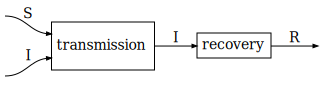

In [3]:
cset_sir = apex(F_epi(sir));
display_wd(sir)

Use Petri.jl to visualize the C-Set

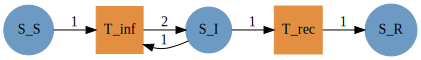

In [4]:
Graph(cset_sir)

define initial states and transition rates, then
create, solve, and visualize ODE problem

In [5]:
u0 = LVector(S=10, I=1, R=0);
p = LVector(inf=0.4, rec=0.4);

The C-Set representation has direct support for generating a DiffEq vector field

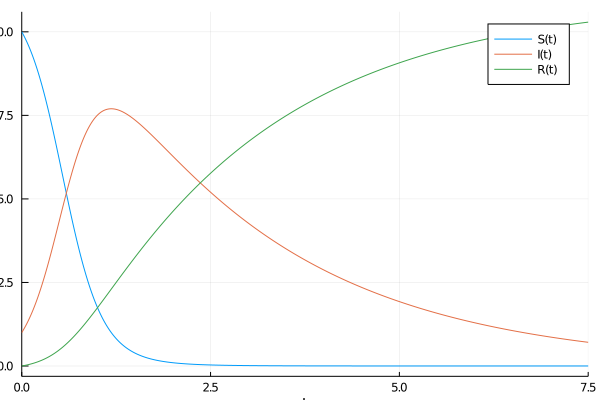

In [6]:
prob = ODEProblem(vectorfield(cset_sir),u0,(0.0,7.5),p);
sol = solve(prob,Tsit5())

plot(sol)

#### SEIR Model:

define model

In [7]:
seir = @program InfectiousDiseases (s::S,i::I) begin
    i2 = illness(exposure(s,i))
    return recovery([i,i2])
end
seir = to_hom_expr(FreeBiproductCategory, seir)

compose(otimes(id(S),mcopy(I)),otimes(compose(exposure,illness),id(I)),mmerge(I),recovery)

here we convert the C-Set decoration to a Petri.jl model
to use its StochasticDifferentialEquations support

┌ Warning: `find_root` is deprecated, use `find_root!` instead.
│   caller = #30 at none:0 [inlined]
└ @ Core ./none:0
┌ Warning: `find_root` is deprecated, use `find_root!` instead.
│   caller = #30 at none:0 [inlined]
└ @ Core ./none:0


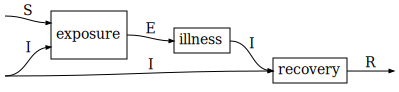

In [8]:
p_seir = apex(F_epi(seir));

display_wd(seir)

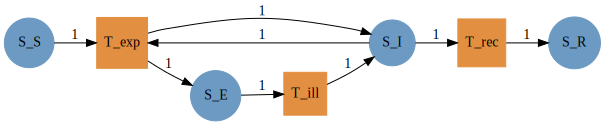

In [9]:
Graph(p_seir)

define initial states and transition rates, then
create, solve, and visualize ODE problem

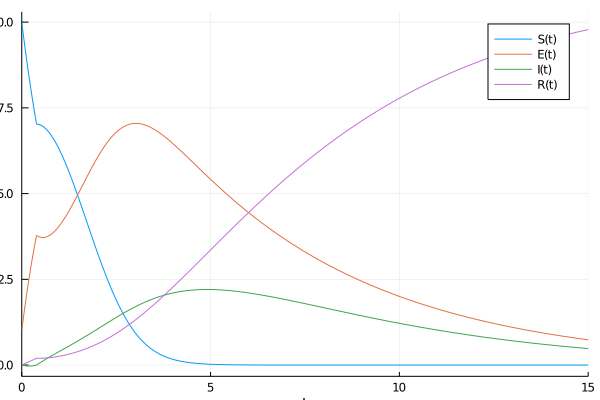

In [10]:
u0 = LVector(S=10, E=1, I=0, R=0);
p = LVector(exp=.9, ill=.2, rec=.5);

prob = ODEProblem(vectorfield(p_seir),u0,(0.0,15.0),p);
sol = solve(prob,Tsit5())

plot(sol)

#### SEIRD Model:

define model

In [11]:
seird = @program InfectiousDiseases (s::S,i::I) begin
    i_all = [i, illness(exposure(s,i))]
    return recovery(i_all), death(i_all)
end
seird = to_hom_expr(FreeBiproductCategory, seird)

compose(otimes(id(S),compose(mcopy(I),otimes(mcopy(I),id(I)))),otimes(id(S),braid(I,I),id(I)),otimes(braid(S,I),id(otimes(I,I))),otimes(id(I),compose(exposure,illness,mcopy(I)),id(I)),otimes(id(otimes(I,I)),braid(I,I)),otimes(compose(mmerge(I),recovery),compose(mmerge(I),death)))

get resulting petri net and visualize model

┌ Warning: `find_root` is deprecated, use `find_root!` instead.
│   caller = #30 at none:0 [inlined]
└ @ Core ./none:0
┌ Warning: `find_root` is deprecated, use `find_root!` instead.
│   caller = #30 at none:0 [inlined]
└ @ Core ./none:0


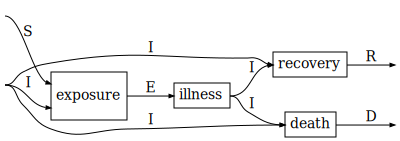

In [12]:
p_seird = apex(F_epi(seird));

display_wd(seird)

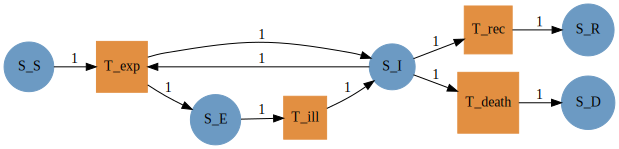

In [13]:
Graph(p_seird)

define initial states and transition rates, then
create, solve, and visualize ODE problem

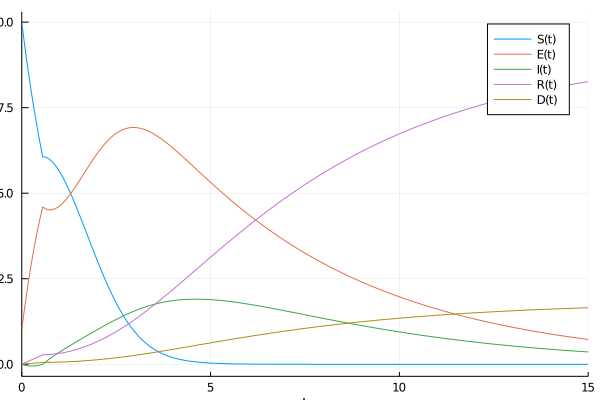

In [14]:
u0 = LVector(S=10, E=1, I=0, R=0, D=0);
p = LVector(exp=0.9, ill=0.2, rec=0.5, death=0.1);

prob = ODEProblem(vectorfield(p_seird),u0,(0.0,15.0),p);
sol = solve(prob,Tsit5())

plot(sol)